<a href="https://colab.research.google.com/github/wcngai/colab-projects/blob/main/CodeFormer_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://user-images.githubusercontent.com/14334509/179359809-bd45566a-486d-418f-83fa-67bbbba8c45c.png" height=120>
</p>

# CodeFormer Inference Demo 
## Towards Robust Blind Face Restoration with Codebook Lookup Transformer (NeurIPS 2022)
Shangchen Zhou, Kelvin C.K. Chan, Chongyi Li, Chen Change Loy

[![GitHub Stars](https://img.shields.io/github/stars/sczhou/CodeFormer?style=social)](https://github.com/sczhou/CodeFormer) [![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2206.11253) [![Hugging Face](https://img.shields.io/badge/Demo-%F0%9F%A4%97%20Hugging%20Face-blue)](https://huggingface.co/spaces/sczhou/CodeFormer) ![visitors](https://visitor-badge.glitch.me/badge?page_id=sczhou/CodeFormer)

# 1. Preparations
Before start, make sure that you choose
* Hardware Accelerator = GPU (in the Runtime menu -> Change runtime type)

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [1]:
# Clone CodeFormer and enter the CodeFormer folder
%cd /content
!rm -rf CodeFormer
!git clone https://github.com/sczhou/CodeFormer.git
%cd CodeFormer

# Set up the environment
# Install python dependencies
!pip install -r requirements.txt
# Install basicsr
!python basicsr/setup.py develop

# Download the pre-trained model
!python scripts/download_pretrained_models.py facelib
!python scripts/download_pretrained_models.py CodeFormer

# Visualization function
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('CodeFormer', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

/content
Cloning into 'CodeFormer'...
remote: Enumerating objects: 468, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 468 (delta 36), reused 60 (delta 31), pack-reused 395
Receiving objects: 100% (468/468), 12.63 MiB | 2.46 MiB/s, done.
Resolving deltas: 100% (196/196), done.
/content/CodeFormer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 76.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.

&nbsp;
***
&nbsp;
# 2. Test on your images 😀

*   Old photos
*   AI-created face images by DALLE2/Midjourney/Stable Diffusion

If CodeFormer is helpful to your photos, please help star our [repo](https://github.com/sczhou/CodeFormer). Thanks! 🤗 

[![GitHub Stars](https://img.shields.io/github/stars/sczhou/CodeFormer?style=social)](https://github.com/sczhou/CodeFormer)

In [2]:
# Upload your own images
import os
from google.colab import files
import shutil

upload_folder = 'inputs/user_upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving WhatsApp Image 2023-02-05 at 9.53.52 PM.jpeg to WhatsApp Image 2023-02-05 at 9.53.52 PM.jpeg
move WhatsApp Image 2023-02-05 at 9.53.52 PM.jpeg to inputs/user_upload/WhatsApp Image 2023-02-05 at 9.53.52 PM.jpeg


In [5]:
# Inference the uploaded images
#@markdown `CODEFORMER_FIDELITY`: Balance the quality (lower number) and fidelity (higher number)<br>
# you can add '--bg_upsampler realesrgan' to enhance the background
CODEFORMER_FIDELITY = 0.75 #@param {type:"slider", min:0, max:1, step:0.01}
#@markdown `BACKGROUND_ENHANCE`: Enhance background image with Real-ESRGAN<br>
BACKGROUND_ENHANCE = False #@param {type:"boolean"}
#@markdown `FACE_UPSAMPLE`: Upsample restored faces for high-resolution AI-created images<br>
FACE_UPSAMPLE = False #@param {type:"boolean"}
if BACKGROUND_ENHANCE:
  if FACE_UPSAMPLE:
    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload --bg_upsampler realesrgan --face_upsample
  else:
    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload --bg_upsampler realesrgan
else:
  !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload

Face detection model: retinaface_resnet50
Background upsampling: False, Face upsampling: False
[1/1] Processing: WhatsApp Image 2023-02-05 at 9.53.52 PM.jpeg
	detect 10 faces

All results are saved in results/user_upload_0.75


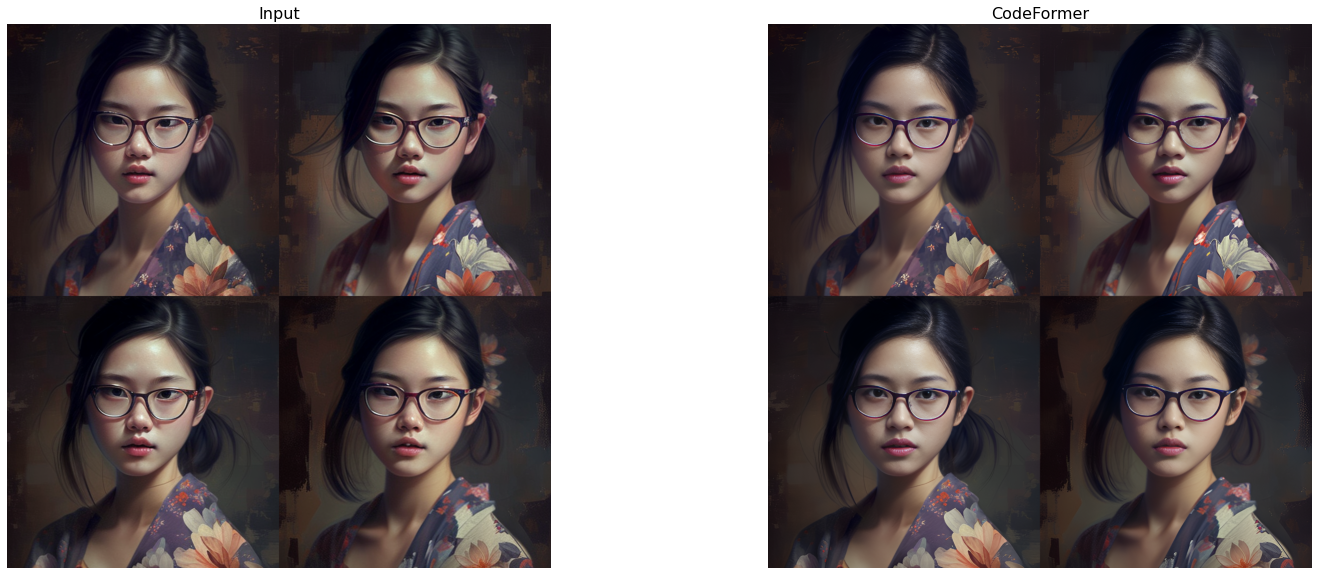

In [ ]:
# Visualize the results
import os
import glob

input_folder = 'inputs/user_upload'
result_folder = f'results/user_upload_{CODEFORMER_FIDELITY}/final_results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
for input_path in input_list:
  img_input = imread(input_path)
  basename = os.path.splitext(os.path.basename(input_path))[0]
  output_path = os.path.join(result_folder, basename+'.png')
  img_output = imread(output_path) 
  display(img_input, img_output)

In [6]:
# Download results
!ls results
print('Download results')
os.system(f'zip -r results.zip results/user_upload_{CODEFORMER_FIDELITY}/final_results')
files.download("results.zip")

user_upload_0.6  user_upload_0.75
Download results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

&nbsp;
***
&nbsp;
# 3. Inference on the demo images (whole images)

In [ ]:
# We set w to 0.7 for the whole images
# you can add '--bg_upsampler realesrgan' to enhance the background
CODEFORMER_FIDELITY = 0.7

## Below is original code
##!python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/whole_imgs --bg_upsampler realesrgan

!python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload --bg_upsampler realesrgan

Face detection model: retinaface_resnet50
Background upsampling: True, Face upsampling: False
[1/1] Processing: tmpixcyn4_p.png
	detect 1 faces

All results are saved in results/user_upload_0.7


In [ ]:
# Visualize the results
import os
import glob

## Below is original code
##input_folder = 'inputs/whole_imgs'
##result_folder = f'results/whole_imgs_{w}/final_results'

input_folder = 'inputs/user_upload'
result_folder = f'results/user_upload/final_results'


input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

&nbsp;
***
&nbsp;
# 4. Inference on the demo faces (croped and aligned faces)

In [ ]:
!rm -rf results

# We set w to 0.5 for the cropped and aligned faces
CODEFORMER_FIDELITY = 0.5

## Below is original code
##!python inference_codeformer.py -w $CODEFORMER_FIDELITY --has_aligned --input_path inputs/cropped_faces

!python inference_codeformer.py -w $CODEFORMER_FIDELITY --has_aligned --input_path inputs/user_upload

Background upsampling: False, Face upsampling: False
[1/1] Processing: tmpixcyn4_p.png

All results are saved in results/user_upload_0.5


In [ ]:
# Visualize the results
import os
import glob

## Below is original code
## input_folder = 'inputs/cropped_faces'
## result_folder = f'results/cropped_faces_{w}/restored_faces'

input_folder = 'inputs/user_upload'
result_folder = f'results/user_upload/restored_faces'

input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

&nbsp;
***
&nbsp;
# 5. Inference Videos


In [7]:
##!pip3 install ffmpeg-python
##import ffmpeg

!apt install ffmpeg
#!pip install ffmpeg
!pip install ffmpeg-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


&nbsp;
****
&nbsp;
## 5.1 Option 1: Upload Individual video

In [ ]:
#### Option 1: Upload Individual video
import os
from google.colab import files
import shutil

upload_folder = 'inputs/user_videos'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving Snaptik_121.mov to Snaptik_121.mov
move Snaptik_121.mov to inputs/user_videos/Snaptik_121.mov


&nbsp;
****
&nbsp;
## 5.2 Option 2: Copy videos from Google Drive: Short_Flim/Preprocess 

In [8]:
#### Option 2: Copy videos from Short_Flim/Preprocess 

import os
from google.colab import files
from google.colab import drive
from os.path import isfile, join
#import shutil

# Mounting Google Drive: Mounted at /content/drive
drive.mount('/content/drive')

# Copy all video files
!mkdir inputs/user_videos
#!rm -rf inputs/user_videos
!cp -r /content/drive/MyDrive/Short_Flims/Preprocess/. /content/CodeFormer/inputs/user_videos/.

# Clean up previous results
!rm -rf results

# Process all video files
CODEFORMER_FIDELITY = 0.8
FOLDER_NAME = "inputs/user_videos/"

for filename in os.listdir(FOLDER_NAME):
  filename_noext = os.path.splitext(filename)[0]
  filename_ext = os.path.splitext(filename)[1]

  fullpath = os.path.join(FOLDER_NAME, filename)
  ## output sample: inputs/user_videos/filename.mp4

  if (isfile(fullpath)):
    print(f'==================================Processing: {fullpath}')
##    !python inference_codeformer.py --face_upsample -w $CODEFORMER_FIDELITY --bg_upsampler realesrgan --input_path $fullpath
##    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path $fullpath


Mounted at /content/drive
mmexport1659179660932.mp4
==================================Processing: inputs/user_videos/mmexport1659179660932.mp4


inputs/user_videos/mmexport1659179660932.mp4
==================================Processing: inputs/user_videos/mmexport1659179660932.mp4


In [ ]:
!ffmpeg -i results/VID_20230102_000536_130_0.2/VID_20230102_000536_130.mp4 -vf "crop=trunc(iw/16)*16:trunc(ih/16)*16" results/VID_20230102_000536_130_0.2/VID_20230102_000536_130_0.2_e.mp4


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
# Export file to the processes folder

OUTPUT_FOLDER_PATH = 'results'
OUTPUT_GOOGLE_DRIVE_PREPOST = "/content/drive/MyDrive/Short_Flims/Prepost/."
OUTPUT_GOOGLE_DRIVE_PROCESSED = "/content/drive/MyDrive/Short_Flims/Postprocess_NOT_FOR_POSTING/."

for output_folder in os.listdir(OUTPUT_FOLDER_PATH):
  fullpath = os.path.join(OUTPUT_FOLDER_PATH, output_folder)
  for output_file in os.listdir(fullpath):
    output_file_fullname = os.path.join(fullpath, output_file)
    if (isfile(output_file_fullname)):
      print(f'Copying files to Goole Drive: {output_file_fullname}')
 #     !ffmpeg -i $output_file_fullname -vf "crop=trunc(iw/16)*16:trunc(ih/16)*16" $output_file_fullname

      !cp -r $output_file_fullname $OUTPUT_GOOGLE_DRIVE_PREPOST
      !cp -r $output_file_fullname $OUTPUT_GOOGLE_DRIVE_PROCESSED



Copying files to Goole Drive: results/IMG_0015_0.8/IMG_0015.mp4


In [ ]:
# Download results
!ls results
print('Download results')

DOWNLOAD_FILE_PATH = "results/Snaptik_121_0.2/"
DOWNLOAD_FILE_NAME = "Snaptik_121.mp4"

os.system(f'zip -r {DOWNLOAD_FILE_NAME}.zip {DOWNLOAD_FILE_PATH}{DOWNLOAD_FILE_NAME}')
files.download(f'{DOWNLOAD_FILE_NAME}.zip')

Snaptik_121_0.2
Download results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>